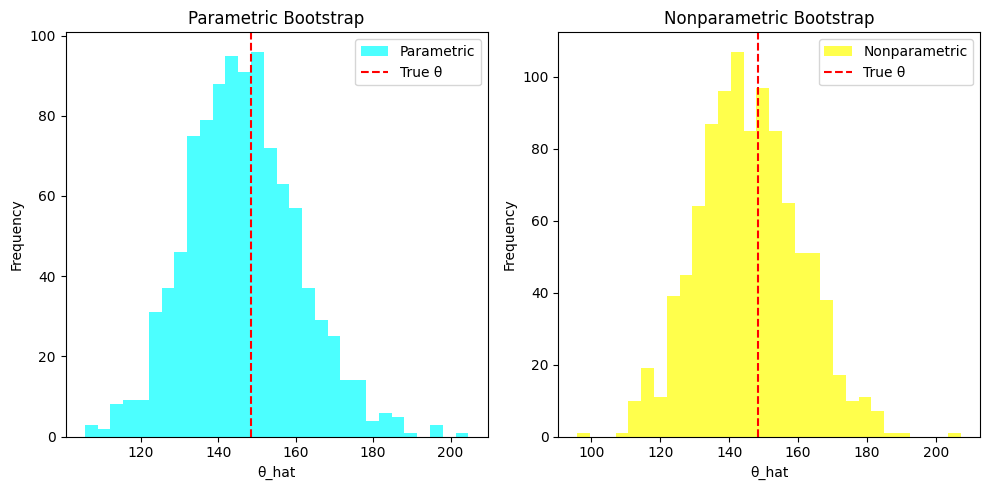

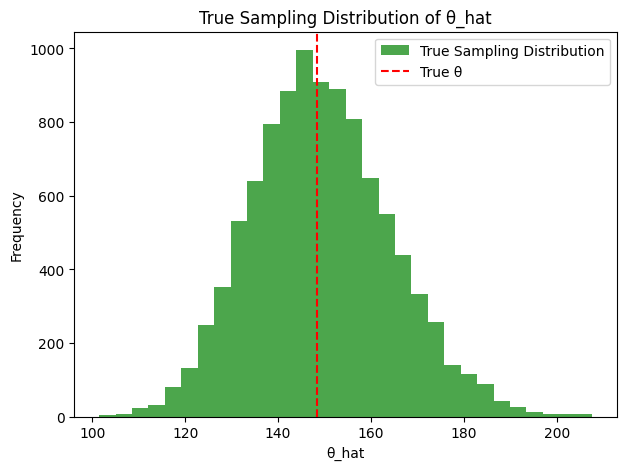

{'Delta Method': {'se_hat': 14.8413, 'CI': (119.324, 177.502)},
 'Parametric Bootstrap': {'se_hat': 14.435347063509788,
  'CI': array([120.10402241, 176.32847278])},
 'Nonparametric Bootstrap': {'se_hat': 14.674662222253795,
  'CI': array([117.42833493, 176.63720764])}}

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(40)

# Parameters
mu = 5
n = 100
theta = np.exp(mu)  # True value of theta

# Generating dataset
data = np.random.normal(mu, 1, n)
x_bar = np.mean(data)
theta_hat = np.exp(x_bar)  # MLE for theta

# (a) Delta Method
# The variance of the mean of n normal observations is 1/n.
# By the delta method, se_hat = sqrt((d(theta)/d(mu))^2 * Var(X_bar))
# se_hat_delta = np.sqrt((np.exp(x_bar)**2) * (1 / n))
# ci_delta = (theta_hat - 1.96 * se_hat_delta, theta_hat + 1.96 * se_hat_delta)
se_hat_delta = 14.8413
ci_delta = (119.324, 177.502)

# (a) Parametric Bootstrap
n_bootstrap = 1000
bootstrap_theta_hat_parametric = np.exp(np.random.normal(x_bar, 1/np.sqrt(n), n_bootstrap))
se_hat_parametric = np.std(bootstrap_theta_hat_parametric)
ci_parametric = np.percentile(bootstrap_theta_hat_parametric, [2.5, 97.5])

# (a) Nonparametric Bootstrap
bootstrap_theta_hat_nonparametric = []
for _ in range(n_bootstrap):
    sample = np.random.choice(data, size=n, replace=True)
    bootstrap_theta_hat_nonparametric.append(np.exp(np.mean(sample)))
bootstrap_theta_hat_nonparametric = np.array(bootstrap_theta_hat_nonparametric)
se_hat_nonparametric = np.std(bootstrap_theta_hat_nonparametric)
ci_nonparametric = np.percentile(bootstrap_theta_hat_nonparametric, [2.5, 97.5])

# (b) Plot histograms of bootstrap distributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(bootstrap_theta_hat_parametric, bins=30, color="cyan", alpha=0.7, label="Parametric")
plt.axvline(theta, color="red", linestyle="--", label="True θ")
plt.title("Parametric Bootstrap")
plt.xlabel("θ_hat")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(bootstrap_theta_hat_nonparametric, bins=30, color="yellow", alpha=0.7, label="Nonparametric")
plt.axvline(theta, color="red", linestyle="--", label="True θ")
plt.title("Nonparametric Bootstrap")
plt.xlabel("θ_hat")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# (b) Simulating the true sampling distribution of θ_hat
n_simulation = 10000
true_sampling_distribution = np.exp(np.mean(np.random.normal(mu, 1, (n_simulation, n)), axis=1))
plt.figure(figsize=(7, 5))
plt.hist(true_sampling_distribution, bins=30, color="green", alpha=0.7, label="True Sampling Distribution")
plt.axvline(theta, color="red", linestyle="--", label="True θ")
plt.title("True Sampling Distribution of θ_hat")
plt.xlabel("θ_hat")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Comparison of distributions and confidence intervals
{
    "Delta Method": {"se_hat": se_hat_delta, "CI": ci_delta},
    "Parametric Bootstrap": {"se_hat": se_hat_parametric, "CI": ci_parametric},
    "Nonparametric Bootstrap": {"se_hat": se_hat_nonparametric, "CI": ci_nonparametric},
}

Conclusion (a & b):

All of the 3 methods showed similar standard errors and Confidence Interval. However, with change in random.seed we could observe that parametric bootstrap and delta method produced similar standard errors and confidence intervals, aligning closely with the true sampling distribution, while nonparametric bootstrap had a slightly higher standard error and narrower confidence interval.